<a href="https://colab.research.google.com/github/EyberRosero/Analitica-De-Datos/blob/master/Punto_3_Covid_19_(Anal%C3%ADtica_e%20_%20Informaci%C3%B3n).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#CARGANDO MODULOS 
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from joblib import dump, load
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as msa
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import mode
from datetime import datetime, timedelta,date
from matplotlib import ticker
from sklearn.manifold import TSNE
from numpy.matlib import repmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


Funciones que ayudará a graficar datos

In [37]:
def roc_auc_mc(roc_auc,fpr,tpr,n_classes,title,path_img):   
    lw = 2
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(6,6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    #colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    colors = sns.color_palette(None, n_classes)
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='AUC_class_{0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="best")#,bbox_to_anchor=(1.4, 0.75))

    plt.show()
def graficas():
  nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,20+1)]
  total =d+nextdays

  # X-axis
  plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

  # Tick-Parameters
  ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
  ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
  ax.tick_params(which='both', width=1,labelsize=14)
  ax.tick_params(which='major', length=6)
  ax.tick_params(which='minor', length=3, color='0.8')

  # Grid
  plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
  plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["Country/Region",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,2:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,2:]),axis = 0)
        mortality_rate = np.round((Total_deaths/(Total_confirmed+1.01))*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,2:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,2:]),axis = 0)
        mortality_rate = np.round((Total_deaths/(Total_confirmed+1.01))*100,2)
    
    return np.nan_to_num(mortality_rate)

def pre_exploratorio(Xtrain_pre,ytrain_pre,path_img,col_sal,w,h,Np=None):
    #exploratorio basico -> Normalizar + reduccion de dimensionalidad
    normalizar = StandardScaler()
    #escoger aleatoriamente puntos para evitar costo computacional - analisis inicial
    if Np == None: Np = len(Xtrain_pre.index)
    
    ind = np.random.randint(0,len(Xtrain_pre.index),Np) #escoger subconjunto de datos
    
    Xz = normalizar.fit_transform(Xtrain_pre.iloc[ind,:])
    yc = ytrain_pre[ind]
    
    #reduccion de dimension con pca y tsne
    red_pca = PCA()
    perplexity = np.round(0.75*np.sqrt(Np))
    red_tsne = TSNE(n_components=2,perplexity = perplexity, n_iter = 250,verbose = 10)
        
    Xred_pca = pd.DataFrame(red_pca.fit_transform(Xz))
    Xred_tsne = pd.DataFrame(red_tsne.fit_transform(Xz))
  
    #Relevancia por variabilidad
    var_ret = 0.95
    rel_vec,Mv,ind_rel = rel_pca(red_pca,var_ret)
    
    #graficar
    sval = 30
    #pca 2D
    Xred_pca.plot(kind="scatter",x=0,y=1,
               c = yc, s=sval, label = col_sal,
              colormap = "jet",colorbar=True, sharex=False)    
    plt.title('PCA 2D')
    plt.xlabel('Componente principal 1')
    plt.ylabel('Componente principal 2')
    plt.show()
    

    #tsne 2D
    Xred_tsne.plot(kind="scatter",x=0,y=1,
               c = yc, s = sval, label = col_sal,
              colormap = "jet",colorbar=True, sharex=False)    
    plt.title('t-sne 2D - Perp.=%.2f' % perplexity)
    plt.xlabel('Embebimiento - Dim. 1')
    plt.ylabel('Embebimiento - Dim. 2')
    plt.show()
    
    return True

def rel_pca(red,var_exp):
    Mv = np.min(np.where(np.cumsum(red.explained_variance_ratio_)
                         >var_exp))
    M,P = red.components_.shape
    #print(P,M)
    rel_vec = np.zeros((P))
    for i in range(Mv):
        #print(i)
        rel_vec += abs(red.explained_variance_ratio_[i]*red.components_[i,:])
    
    rel_vec = rel_vec/sum(rel_vec)
    rel_vec = rel_vec - min(rel_vec)
    rel_vec = rel_vec/max(rel_vec)
    
    ind_rel = rel_vec.argsort()[::-1]
    return rel_vec, Mv,ind_rel

def covid_win(serie,w=5):
    pi =0
    pf = w
    X = serie[pi:pf].reshape(1,-1)
    y = serie[pf+1].reshape(1,-1)
    pi += 1
    pf+= 1
    while pf+1 < serie.shape[0]:
      X = np.append(X,serie[pi:pf].reshape(1,-1),axis=0)
      y = np.append(y,serie[pf+1].reshape(1,-1),axis=0)
      pi += 1
      pf+=1
    return X, y # X \in Real^{N x P = w}, y \in Real^N

def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'
class tsne_map(BaseEstimator,TransformerMixin):
    #inicializacion de clase y varaibles
    def __init__(self, n_components = 2,perplexity=10, n_neighbors = 10): #constructor clase con hyperparámetros
        self.n_components = n_components
        self.perplexity = perplexity
        self.n_neighbors = n_neighbors
        return None

    def fit(self,X,*_): #entrenamiento, primero se hace tsne y luego se entrena el regresor knn para llevar del espacio X as Z
        red = TSNE(n_components = self.n_components,perplexity=self.perplexity)
        z = red.fit_transform(X)

        self.neigh = KNeighborsRegressor(n_neighbors=self.n_neighbors) 
        self.neigh.fit(X, z) #entrenamiento knn, se guarda en la clase
        return self
    def transform(self,X,*_):
       return self.neigh.predict(X) #evaluar en puntos nuevos-> transform o predict

    def fit_transform(self,X,*_): #entrenar y evaluar, solo para caso xtrain y ztrain
        self.fit(X)
        red = TSNE(n_components = self.n_components,perplexity=self.perplexity)
        return self.transform(X)#red.fit_transform(X)}
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
def roc_multiclass(ytrue,yscore):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = ytrue.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ytrue[:, i], yscore[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(ytrue.ravel(), yscore.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return roc_auc, fpr, tpr, n_classes

##Cargar Base de datos con link en código






In [5]:
!pip install mglearn
import mglearn

     |████████████████████████████████| 542kB 2.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=942d727ccf9e7135b1080cce84d3380b10bfb0ab73d2df73bf19986790207292
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [152]:
!pip install wget
import wget
import pandas as pd
#datos covid19 - mundo (Casos confimados, muertes, recuperados)
url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"

url2 = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv"

url3 = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv"

df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

In [7]:
#Importar mapa mundi para visualizar los datos con informacion demografica
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

urlimg = "https://static.wixstatic.com/media/8bffd4_5c83f00991254f75aefb2a1aeddcfc90~mv2.gif"

wget.download(urlimg, 'mapa.jpg')
mapa = mpimg.imread('mapa.jpg')

#**Análisis exploratorio y visualización sobre datos muestreados**

##Datos de Casos Confirmados de Covid-19 en el mundo


In [68]:
wget.download(url, 'confirmed.csv')
confirmed = pd.read_csv('confirmed.csv')
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,499,499,513,513,514,611,632,639,659,661,662,671,683,688,693,698,698,702,707,710,711,712,713,713,713,714,715,717,719,719,720,721,724,724,726,727,727,729,732,732
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,469,482,484,496,524,560,591,632,705,728,844,885,902,909,919,922,941,967,992,1015,1076,1089,1103,1118,1128,1158,1190,1221,1240,1248,1265,1284,1297,1318,1356,1380,1389,1465,1498,1516
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132,141,141,141,141,162,162,163,176,176,176,197,197,210,210,247,247,247,265,265,272,272,272,272,272,303,303,303,309,309,311,311,311,313,314,314,317,317,317,321
264,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4370,4453,4529,4609,4690,4763,4834,4902,4971,5035,5097,5160,5221,5279,5338,5399,5457,5513,5567,5630,5691,5747,5799,5849,5900,5900,6005,6058,6058,6159,6213,6262,6315,6364,6410,6457,6506,6552,6596,6643


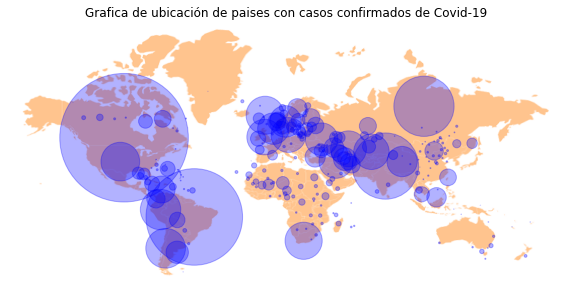

In [9]:

confirmed.plot(kind="scatter", x="Long", y="Lat",alpha=0.3,s=confirmed["7/12/20"]/200, figsize=(10,7),color='b')
plt.title(u'Grafica de ubicación de paises con casos confirmados de Covid-19')
plt.imshow(mapa,extent=[-180, 202, -60, 119],alpha=0.6)
plt.xlabel('Longitud') 
plt.ylabel(u'Latitud') 
plt.axis('off')
plt.show()



##Datos de Muertes por Covid-19 en el mundo

In [69]:
wget.download(url2, 'deaths.csv')
deaths = pd.read_csv('deaths.csv')
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721,733,746,774,807,819,826,864,898,920,936,957,971,994,1010,1012,1048
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55,58,62,65,69,72,74,76,79,81,83,83,85,89,93,95,97
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,690,698,707,715,724,732,741,751,760,767,777,788,799,811,825,837,845,852,861,869,878,885,892,897,905,912,920,928,937,946,952,959,968,978,988,996,1004,1011,1018,1028
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51,51,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,5,5,6,6,6,6,7,8,8,9,9,10,10,10,10,10,10,11,11,13,15,17,18,19,19,19,21,21,22,23,23,26,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,111,111,112,112,127,129,136,139,160,164,208,214,244,248,251,254,256,257,261,274,288,293,296,302,304,312,318,325,335,337,338,345,348,351,361,364,365,417,424,429
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,3,3,5,5,5,5,5,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
264,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48,48,48,48,48,48,49,49,50,50,50,50,51,51,51,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,53,53,53,54,54,55,55,55,55,56


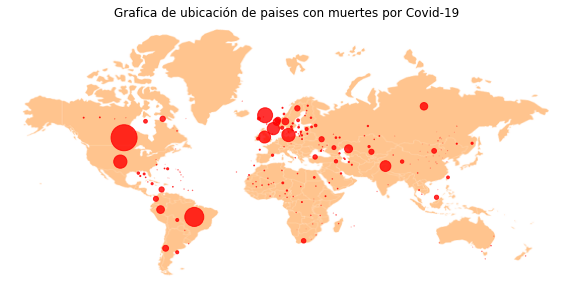

In [11]:
deaths.plot(kind="scatter", x="Long", y="Lat",alpha=0.8,s=deaths["7/12/20"]/200, figsize=(10,7),color='r')
plt.title(u'Grafica de ubicación de paises con muertes por Covid-19')
plt.imshow(mapa,extent=[-180, 202, -60, 119],alpha=0.6)
plt.xlabel('Longitud') 
plt.ylabel(u'Latitud') 
plt.axis('off')
plt.show()


#Datos de Recuperados de Covid-19 en el mundo

In [70]:
wget.download(url3, 'recovered.csv')
recovered = pd.read_csv('recovered.csv')
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6453,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196,8324,8422,8559,8674,8792,8920,9066,9202,9371,9674,9897,10040,10342,10832,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019,14295
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,741,741,744,751,757,759,780,781,781,781,789,789,791,792,792,792,792,796,797,797,797,799,799,799,799,799,799,800,800,800,800,800,800,802,802,803,803,803,803,803
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21,24,24,38,38,40,41,42,61,61,64,64,64,64,66,66,77,77,77,77,81,81,81,81,93,93,97,97,107,108,108,108,117,117,117,117,118,118,118,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,68,68,68,68,76,135,146,156,176,177,177,182,188,191,199,203,203,203,208,211,214,219,219,219,235,236,252,260,267,267,268,269,279,283,283,284,284,286,286,286
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,23,23,23,23,23,23,23,28,39,53,79,91,271,273,288,328,347,350,356,379,386,402,417,430,432,488,504,513,536,537,552,575,591,595,619,630,642,659,675,685
250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,55,67,67,67,67,97,97,97,114,114,114,127,127,129,129,159,159,159,159,159,161,161,161,161,161,200,200,200,241,241,266,266,266,272,272,272,296,296,296,302
251,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2491,2583,2673,2763,2815,2947,3062,3158,3288,3409,3503,3624,3700,3762,3830,3894,3995,4039,4109,4194,4267,4331,4391,4448,4506,4506,4627,4690,4690,4809,4858,4914,4965,5011,5067,5115,5176,5228,5278,5332


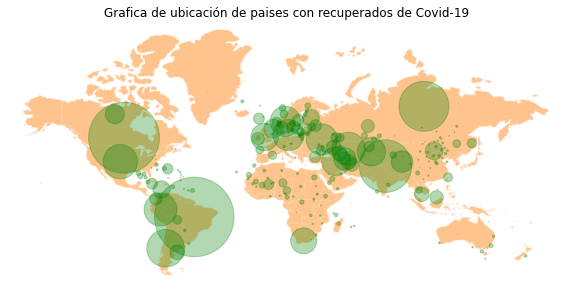

In [13]:
recovered.plot(kind="scatter", x="Long", y="Lat",alpha=0.3,s=recovered["7/12/20"]/200, figsize=(10,7),color='g')
plt.title(u'Grafica de ubicación de paises con recuperados de Covid-19')
plt.imshow(mapa,extent=[-180, 202, -60, 119],alpha=0.6)
plt.xlabel('Longitud') 
plt.ylabel(u'Latitud') 
plt.axis('off')
plt.show()


#Datos de Casos Activos de Covid-19 en el mundo

Se calcula a partir del número de personas confirmadas - muertos - recuperados

In [71]:
active =confirmed.copy()
active.iloc[:,4:] = active.iloc[:,4:] - deaths.iloc[:,4:] - recovered.iloc[:,4:]
active

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.939110,67.709953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,16898.0,17394.0,18110.0,18377.0,18424.0,18724.0,19138.0,19172.0,19450.0,19570.0,19885.0,20311.0,20212.0,19326.0,19368.0,19563.0,19488.0,19718.0,19603.0,19132.0,19326.0,19462.0,19239.0,17642.0,16571.0,16640.0,15411.0,15174.0,14174.0,12682.0,12721.0,12189.0,12285.0,11958.0,12104.0,12341.0,12237.0,12225.0,12189.0,12238.0
1,NaN,Albania,41.153300,20.168300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,269.0,273.0,274.0,284.0,305.0,327.0,349.0,346.0,389.0,441.0,499.0,571.0,607.0,663.0,682.0,722.0,784.0,792.0,807.0,850.0,893.0,920.0,931.0,963.0,970.0,1014.0,999.0,1034.0,1088.0,1108.0,1160.0,1183.0,1213.0,1232.0,1273.0,1318.0,1401.0,1415.0,1462.0,1508.0
2,NaN,Algeria,28.033900,1.659600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2792.0,2721.0,2730.0,2751.0,2707.0,2678.0,2593.0,2625.0,2630.0,2546.0,2519.0,2517.0,2526.0,2496.0,2483.0,2470.0,2504.0,2509.0,2541.0,2587.0,2647.0,2734.0,2874.0,3005.0,2992.0,3098.0,3312.0,3387.0,3301.0,3373.0,3497.0,3561.0,3817.0,4041.0,4183.0,4122.0,4584.0,4441.0,4652.0,4893.0
3,NaN,Andorra,42.506300,1.521800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.0,60.0,57.0,50.0,44.0,42.0,21.0,21.0,21.0,21.0,13.0,13.0,11.0,11.0,11.0,11.0,11.0,7.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,6.0
4,NaN,Angola,-11.202700,17.873900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.0,60.0,63.0,50.0,54.0,69.0,72.0,83.0,71.0,73.0,72.0,78.0,84.0,94.0,98.0,101.0,97.0,99.0,102.0,110.0,121.0,121.0,168.0,175.0,172.0,178.0,179.0,201.0,203.0,219.0,219.0,219.0,248.0,248.0,257.0,318.0,321.0,362.0,381.0,397.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186400,6.613100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,NaN,Yemen,15.552727,48.516388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,NaN,Comoros,-11.645500,43.333300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

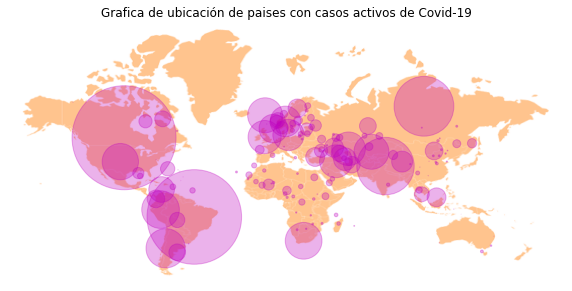

In [15]:
active.plot(kind="scatter", x="Long", y="Lat",alpha=0.3,s=active["7/12/20"]/200, figsize=(10,7),color='m')
plt.title(u'Grafica de ubicación de paises con casos activos de Covid-19')
plt.imshow(mapa,extent=[-180, 202, -60, 119],alpha=0.6)
plt.xlabel('Longitud') 
plt.ylabel(u'Latitud') 
plt.axis('off')
plt.show()

#Análisis de Covid-19 por paises

Solo se realizará un análisis por país entonces se eliminarán las columnas correspondientes a latitud, longitud y los datos de Province/State estan incompletos.

In [72]:
confirmed = confirmed.drop(columns=['Lat', 'Long','Province/State'])
deaths = deaths.drop(columns=['Lat', 'Long','Province/State'])
recovered  = recovered.drop(columns=['Lat', 'Long','Province/State'])
active = active.drop(columns=['Lat', 'Long','Province/State'])


In [73]:
case_nums_country = confirmed.groupby("Country/Region").sum().apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

Se crea los nombres correspondientes a los continentes 

In [74]:
countries = np.asarray(confirmed["Country/Region"])
countries1 = np.asarray(recovered["Country/Region"])
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

In [98]:
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Australia', 'Australia', 'Australia', 'Australia', 'Australia',
       'Australia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Canada', 'Canada', 'Canada', 'Canada', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China

Se inserta en una nueva columna el continente correspondiente, consultando el codigo del País para poder asignarlo

In [75]:
#Collecting Continent Information
confirmed.insert(1,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
deaths.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
recovered.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
active.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])

#Gráficas de Datos Acumulados por País

Las gráficas siguientes se muestran los datos acumulados por país (20 mas impactados por la pandemia) de casos de **Confirmados**, **Muertes** y **Recuparados** de COVID-19

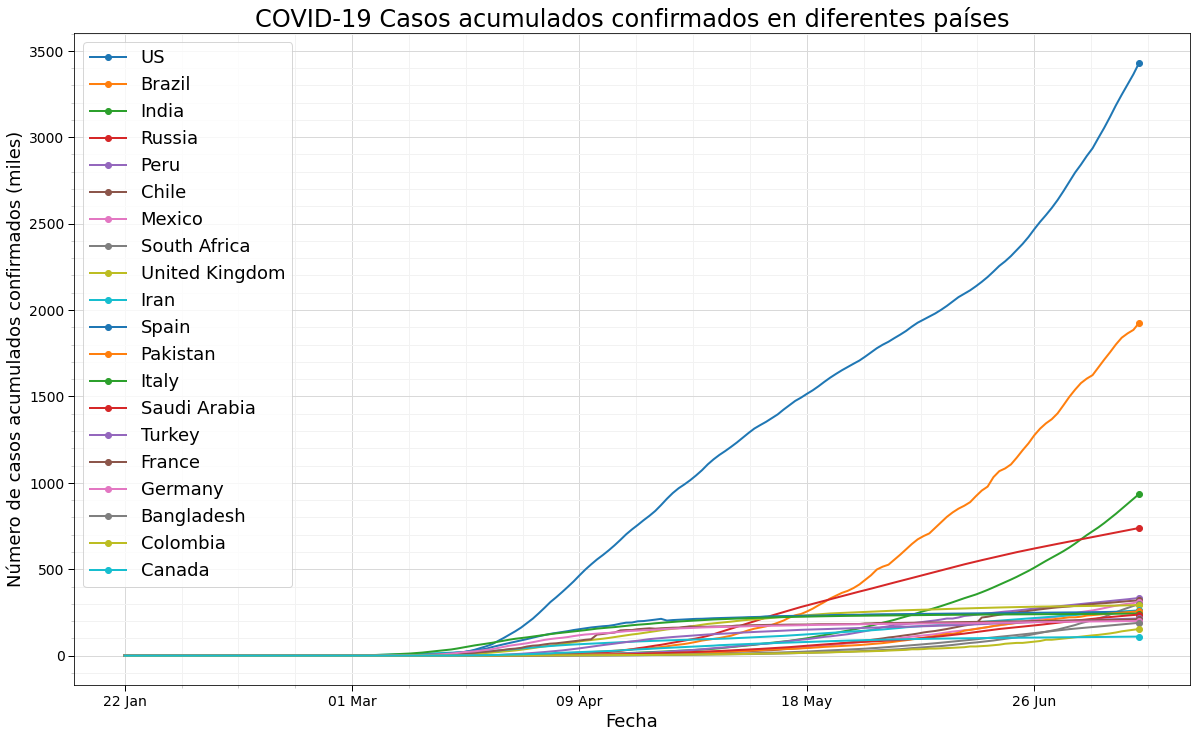

In [20]:
thoudand = 1000
temp = confirmed.groupby('Country/Region').sum().sort_values(confirmed.columns[-1],ascending =False).head(20).replace(np.nan,0)
threshold = 0
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    t = temp.loc[temp.index== country].values[0]
    t = t[t>=threshold]
    
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/thoudand,'-o',label = country,linewidth =2, markevery=[-1])
graficas()
plt.title("COVID-19 Casos acumulados confirmados en diferentes países",{'fontsize':24})
plt.xlabel("Fecha",fontsize =18)
plt.ylabel("Número de casos acumulados confirmados (miles)",fontsize =18)
plt.legend(fontsize=18) 
plt.show()

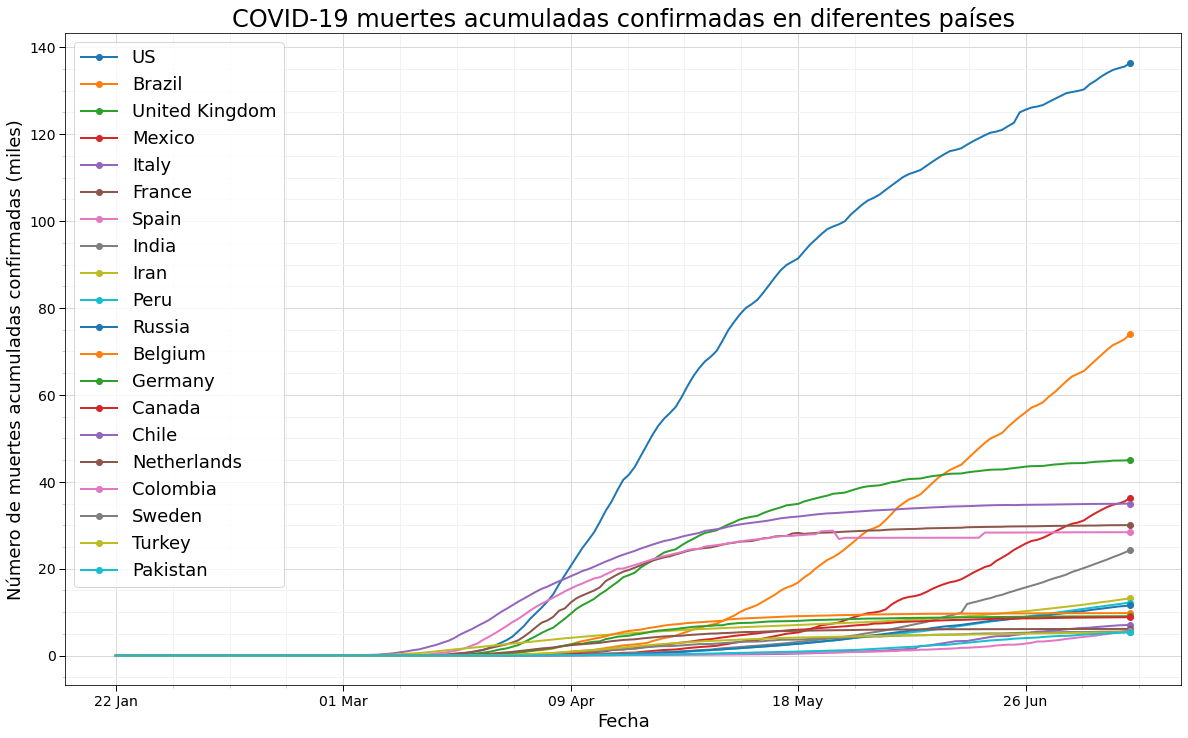

In [76]:
thoudand = 1000
temp = deaths.groupby('Country/Region').sum().sort_values(deaths.columns[-1],ascending =False).head(20).replace(np.nan,0)
threshold = 0
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    t = temp.loc[temp.index== country].values[0]
    t = t[t>=threshold]
    
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/thoudand,'-o',label = country,linewidth =2, markevery=[-1])
graficas()
plt.title("COVID-19 muertes acumuladas confirmadas en diferentes países",{'fontsize':24})
plt.xlabel("Fecha",fontsize =18)
plt.ylabel("Número de muertes acumuladas confirmadas (miles)",fontsize =18)
plt.legend(fontsize=18) 
plt.show()

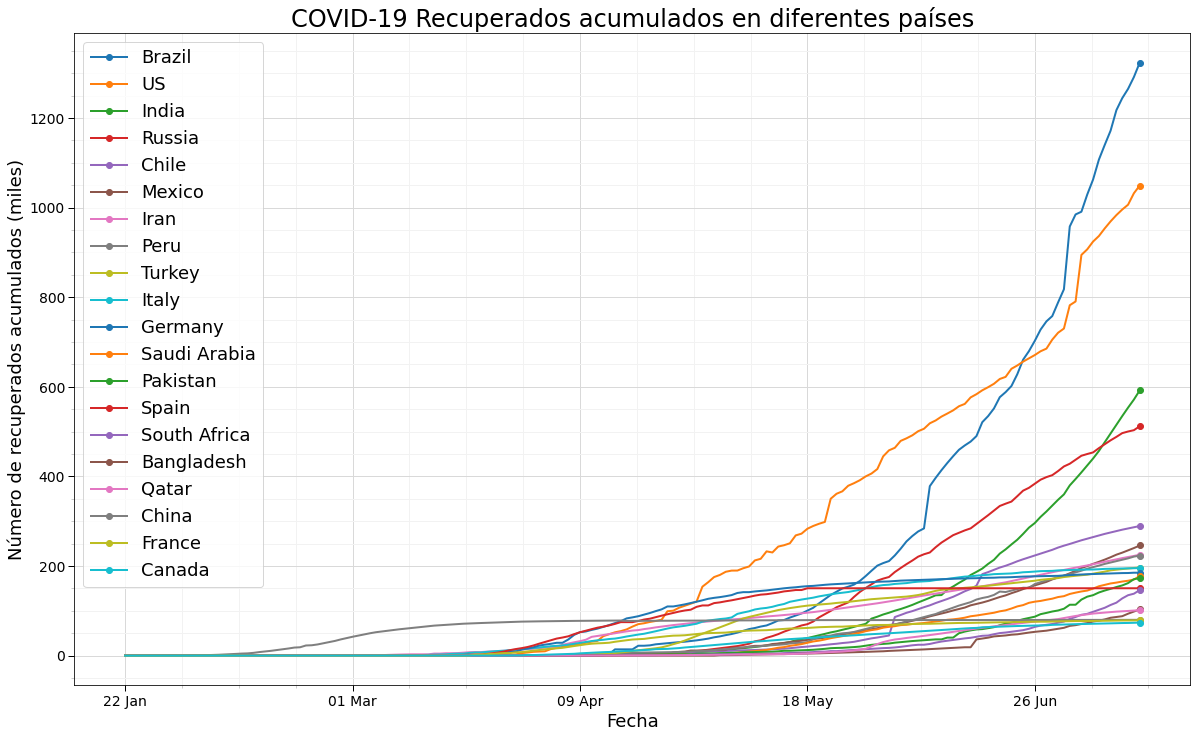

In [77]:
thoudand = 1000
temp = recovered.groupby('Country/Region').sum().sort_values(recovered.columns[-1],ascending =False).head(20).replace(np.nan,0)
threshold = 0
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    t = temp.loc[temp.index== country].values[0]
    t = t[t>=threshold]
    
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/thoudand,'-o',label = country,linewidth =2, markevery=[-1])
graficas()
plt.title("COVID-19 Recuperados acumulados en diferentes países",{'fontsize':24})
plt.xlabel("Fecha",fontsize =18)
plt.ylabel("Número de recuperados acumulados (miles)",fontsize =18)
plt.legend(fontsize=18) 
plt.show()

#Gráficas de Datos diarios por País

Las gráficas siguientes se muestran los datos diarios por país (20 mas impactados por la pandemia) de casos de **Confirmados**, **Muertes**, **Recuparados** y **Activos** de COVID-19

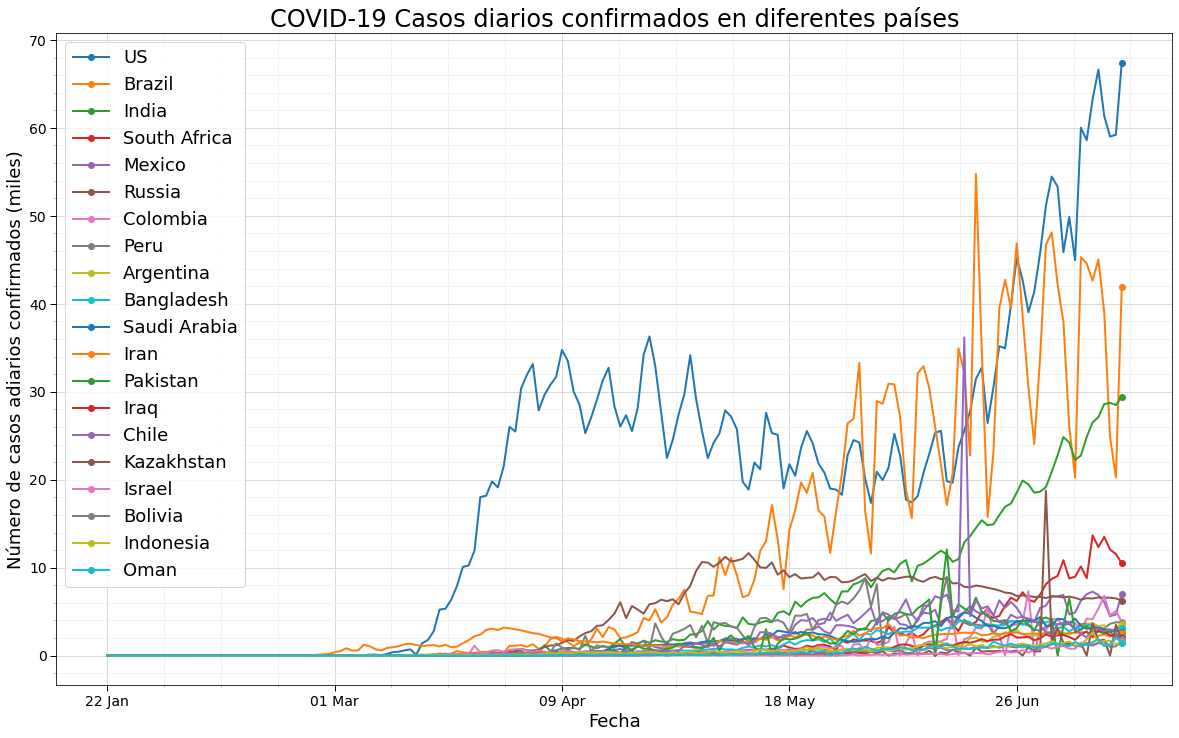

In [78]:
thoudand = 1000
temp = confirmed.groupby('Country/Region').sum().diff(axis=1).sort_values(confirmed.columns[-1],ascending =False).head(20).replace(np.nan,0)
threshold = 0
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    t = temp.loc[temp.index== country].values[0]
    t = t[t>=threshold]
    
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/thoudand,'-o',label = country,linewidth =2, markevery=[-1])
graficas()
plt.title("COVID-19 Casos diarios confirmados en diferentes países",{'fontsize':24})
plt.xlabel("Fecha",fontsize =18)
plt.ylabel("Número de casos adiarios confirmados (miles)",fontsize =18)
plt.legend(fontsize=18) 
plt.show()

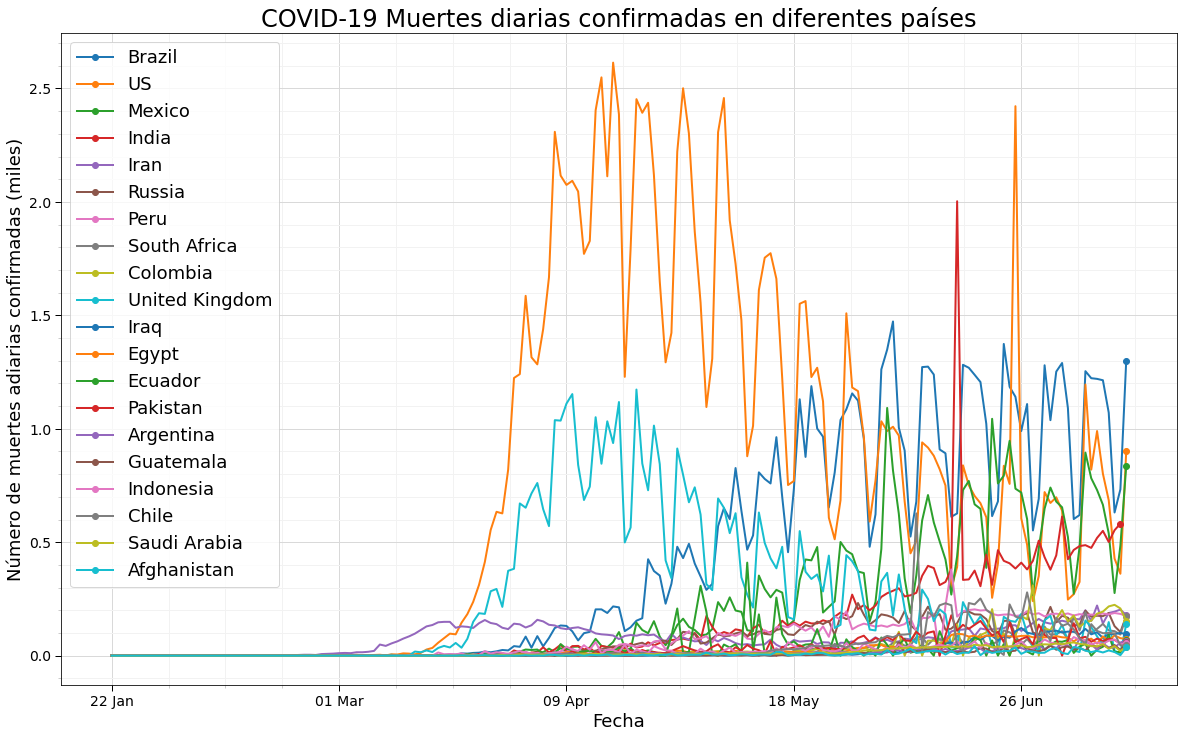

In [79]:
thoudand = 1000
temp = deaths.groupby('Country/Region').sum().diff(axis=1).sort_values(deaths.columns[-1],ascending =False).head(20).replace(np.nan,0)
threshold = 0
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    t = temp.loc[temp.index== country].values[0]
    t = t[t>=threshold]
    
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/thoudand,'-o',label = country,linewidth =2, markevery=[-1])
graficas()
plt.title("COVID-19 Muertes diarias confirmadas en diferentes países",{'fontsize':24})
plt.xlabel("Fecha",fontsize =18)
plt.ylabel("Número de muertes adiarias confirmadas (miles)",fontsize =18)
plt.legend(fontsize=18) 
plt.show()

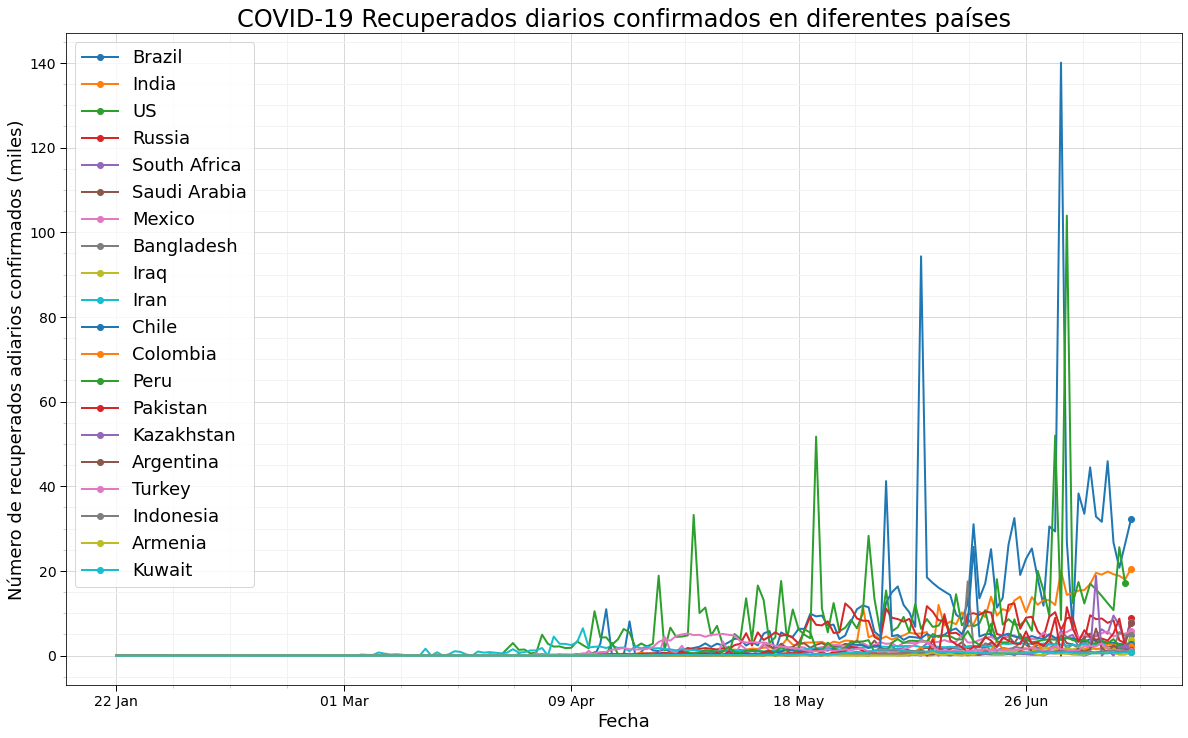

In [80]:
thoudand = 1000
temp = recovered.groupby('Country/Region').sum().diff(axis=1).sort_values(recovered.columns[-1],ascending =False).head(20).replace(np.nan,0)
threshold = 0
f = plt.figure(figsize=(20,12))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    t = temp.loc[temp.index== country].values[0]
    t = t[t>=threshold]
    
    date = np.arange(0,len(t[:]))
    plt.plot(date,t/thoudand,'-o',label = country,linewidth =2, markevery=[-1])
graficas()
plt.title("COVID-19 Recuperados diarios confirmados en diferentes países",{'fontsize':24})
plt.xlabel("Fecha",fontsize =18)
plt.ylabel("Número de recuperados adiarios confirmados (miles)",fontsize =18)
plt.legend(fontsize=18) 
plt.show()

##Análisis exploratorio básico

Primero se eliminan columnas para hacer analisis a variables mas relacionadas, ademas se identifican las correlaciones de los atributos

In [153]:
df_covid19 = df_covid19.drop(columns=['People_Tested', 'People_Hospitalized','UID','Long_','Lat','Last_Update','ISO3'])
corr_matrix = df_covid19.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
Confirmed,1.000000,0.932207,0.912522,0.941940,0.236852,0.067897
Deaths,0.932207,1.000000,0.824848,0.889734,0.206138,0.245113
Recovered,0.912522,0.824848,1.000000,0.722913,0.273062,0.069352
Active,0.941940,0.889734,0.722913,1.000000,0.179625,0.055483
Incident_Rate,0.236852,0.206138,0.273062,0.179625,1.000000,-0.008865
Mortality_Rate,0.067897,0.245113,0.069352,0.055483,-0.008865,1.000000


In [154]:
Tag2 = []
name2 = []
a=0
b=0
c=0
d=0
for i in df_covid19['Mortality_Rate']:
    if(i<= 2):
        Tag2.append(0)
        name2.append('bajo')
        a=a+1
    elif(i>2 and i<=7):
        Tag2.append(1)
        name2.append('medio')
        b=b+1
    elif (i>7):
        Tag2.append(2)
        name2.append('alto')
        c=c+1

Tag2 = np.array(Tag2)
name2 = np.array(name2)
target_name2 = np.array(('bajo','medio','alto'))

In [155]:
df_covid19['Rango'] = Tag2

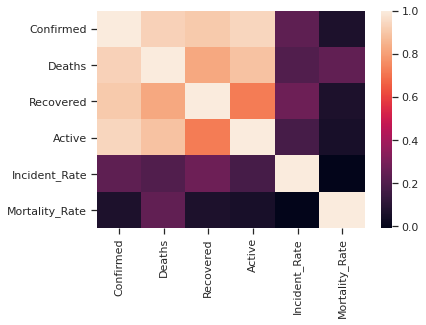

In [158]:
import seaborn as sns

sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)

Se puede observar las variables que mas estan correlacionadas en las que se podria encontrar informacion relevante, por ejemplo entre los casos confirmados y los recuperados de covid-19

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b7e9daba8>,
      dtype=object)

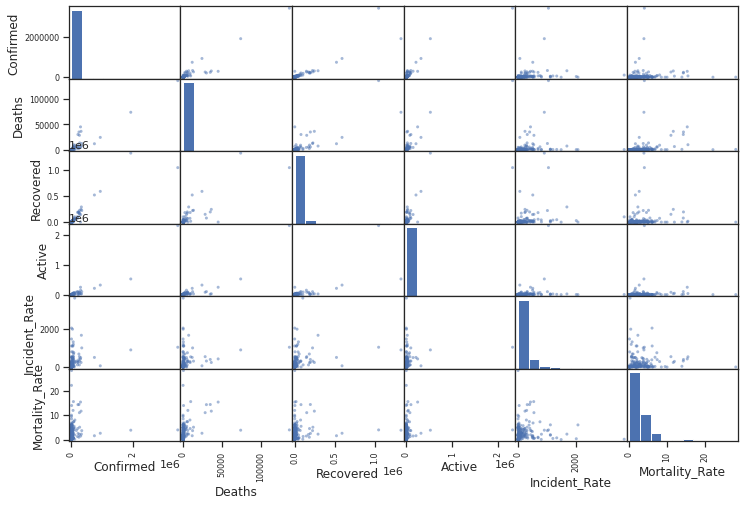

In [148]:
import seaborn as sns
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Confirmed", "Deaths", "Recovered","Active","Incident_Rate","Mortality_Rate"]
scatter_matrix(df_covid19[attributes], figsize=(12, 8))


Aquí se verifica la relacion entre los atributos antes mencionados

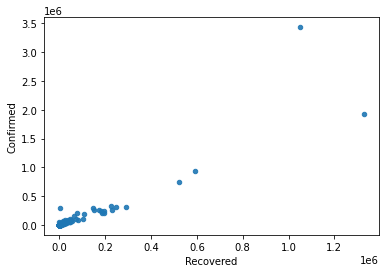

In [32]:
df_covid19.plot(kind="scatter", x="Recovered", y="Confirmed",
             alpha=0.9)

A continuación se hacen graficas de los diferentes atributos teniendo en cuenta el rango de la Tasa de Mortalidad en la que se encuentran los paises

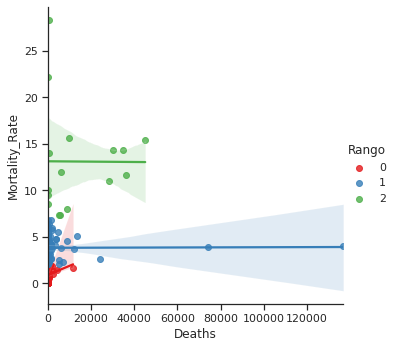

In [164]:
g = sns.lmplot(x='Deaths',y='Mortality_Rate',hue='Rango',data=df_covid19,palette='Set1')

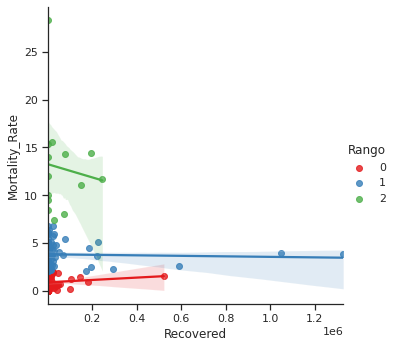

In [166]:
g = sns.lmplot(x='Recovered',y='Mortality_Rate',hue='Rango',data=df_covid19,palette='Set1')

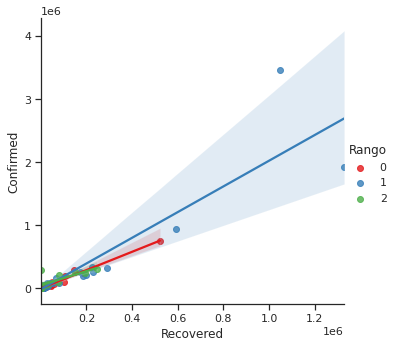

In [167]:
g = sns.lmplot(x='Recovered',y='Confirmed',hue='Rango',data=df_covid19,palette='Set1')

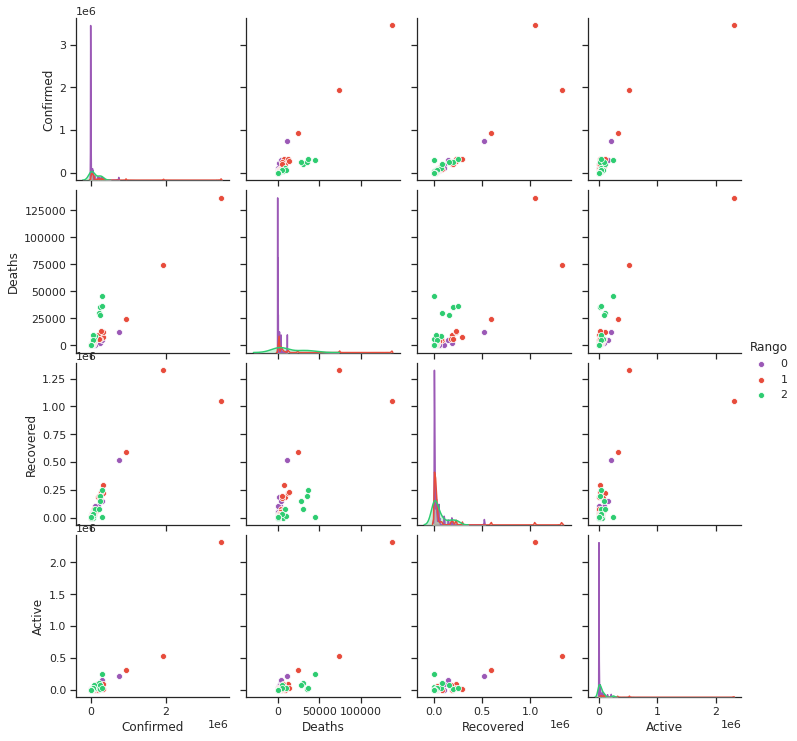

In [163]:
lista=['Confirmed','Deaths','Recovered','Active']
sns.pairplot(df_covid19,vars=lista,hue='Rango',palette=["#9b59b6", "#e74c3c", "#2ecc71"])

Se puede observar que los paises que tiene una relacion baja en cuanto a sus Casos Confirmados,Muertos, Recuperados y Activos, tienen una Tasa de Mortalidad Alta  

#Datos en el mundo
Aquí se grafican los datos anteriores acumulados y por día en el mundo, para ver su comportamiento y tendencia.

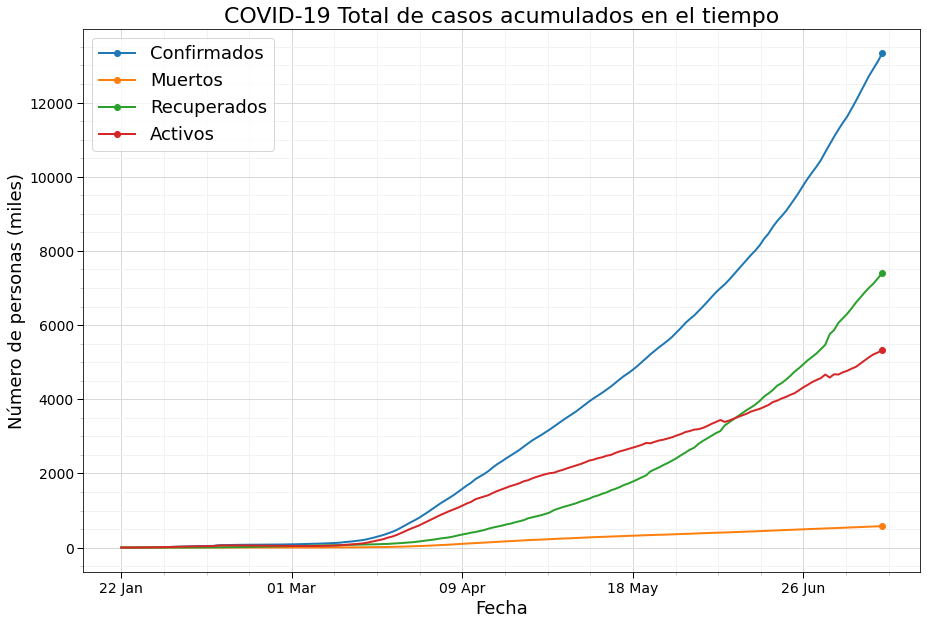

In [33]:
# Data
label_names = ["Confirmados", "Muertos","Recuperados","Activos"]
temp_data = [np.nan_to_num(confirmed.sum()[2:]),np.nan_to_num(deaths.sum()[2:]),np.nan_to_num(recovered.sum()[2:]),np.nan_to_num(active.sum()[2:])]
date = np.arange(0,len(temp_data[0]))
thousand = 1000
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

for i in range(len(temp_data)):
  marker_style = dict(linewidth=2)
  plt.plot(date,temp_data[i]/thousand,'-o',**marker_style,markevery=[-1],label=label_names[i])

graficas()
plt.title("COVID-19 Total de casos acumulados en el tiempo",{'fontsize':22})
plt.xlabel("Fecha",fontsize =18)
plt.ylabel("Número de personas (miles)",fontsize =18)
plt.legend(fontsize=18) 
plt.show()

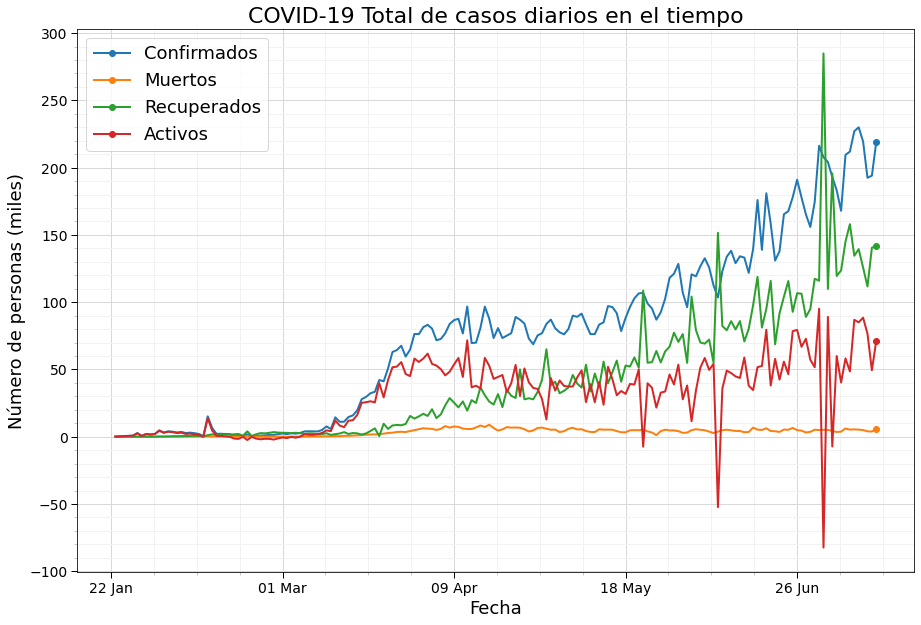

In [34]:
# Data
label_names = ["Confirmados", "Muertos","Recuperados","Activos"]
temp_data = [np.nan_to_num(confirmed.sum()[2:].diff()),np.nan_to_num(deaths.sum()[2:].diff()),np.nan_to_num(recovered.sum()[2:].diff()),np.nan_to_num(active.sum()[2:].diff())]
date = np.arange(0,len(temp_data[0]))
thousand = 1000
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

for i in range(len(temp_data)):
  marker_style = dict(linewidth=2)
  plt.plot(date,temp_data[i]/thousand,'-o',**marker_style,markevery=[-1],label=label_names[i])

graficas()
plt.title("COVID-19 Total de casos diarios en el tiempo",{'fontsize':22})
plt.xlabel("Fecha",fontsize =18)
plt.ylabel("Número de personas (miles)",fontsize =18)
plt.legend(fontsize=18) 
plt.show()

##COVID-19 Variación de la tasa de mortalidad durante un período de tiempo

Para cualquier epidemia, la evaluación más importante es la tasa de mortalidad. Es la medida del número de muertes en una población particular durante un intervalo específico.

Esta curva muestra cómo la tasa de mortalidad varía desde el 22 de enero de 2020 hasta la fecha en todo el mundo.



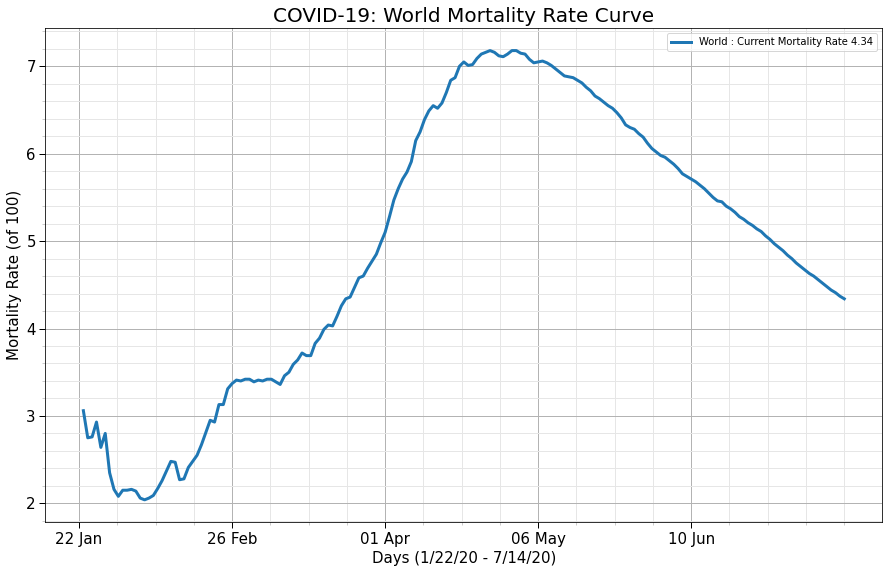

In [38]:
df_continents= confirmed.groupby(["continent"]).sum()
continents = df_continents.sort_values(df_continents.columns[-1],ascending = False).index
continents = ["All"]+list(continents)

cols =1
rows = 2
axis_label = ["Days ("+confirmed.columns[2]+" - "+confirmed.columns[-1]+")","Mortality Rate (of 100)"]

f = plt.figure(figsize=(15,10*rows))

#SubPlot 1
ax = f.add_subplot(211)
mortality_rate = get_mortality_rate(confirmed,deaths,continent=continents[0])
plt.plot(np.arange(1,mortality_rate.shape[0]+1),mortality_rate,label = "World : Current Mortality Rate "+str(mortality_rate[-1]),linewidth=3)

nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,0+1)]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

plt_title = "COVID-19: World Mortality Rate Curve"
plot_params(ax,axis_label,plt_title)
# Legend Location
l = plt.legend(loc= "best")


Esta curva muestra como la tasa mortalidad del COVID-19 varia al pasar de los días por cada país

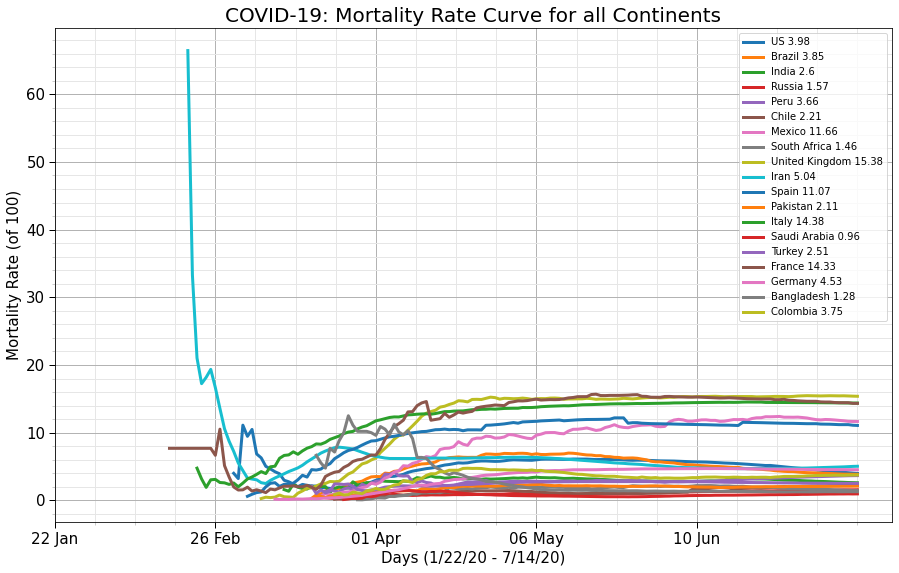

In [40]:
df_continents= confirmed.groupby(["Country/Region"]).sum()
continents = df_continents.sort_values(df_continents.columns[-1],ascending = False).index
continents = ["All"]+list(continents)

cols =1
rows = 2
axis_label = ["Days ("+confirmed.columns[2]+" - "+confirmed.columns[-1]+")","Mortality Rate (of 100)"]

f = plt.figure(figsize=(15,10*rows))
ax = f.add_subplot(212)
for i, continent in enumerate(continents[1:20]):
    mortality_rate = get_mortality_rate(confirmed,deaths,country=continent)
#     mortality_rate = mortality_rate.replace(np.nan, 0, regex=True)
    plt.plot(np.arange(1+mortality_rate[mortality_rate == 0].shape[0],mortality_rate[mortality_rate == 0].shape[0]+mortality_rate[mortality_rate > 0].shape[0]+1),mortality_rate[mortality_rate > 0],label = continents[i+1]+" "+str(mortality_rate[-1]),linewidth=3)



# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])
    
plt_title = "COVID-19: Mortality Rate Curve for all Continents"
plot_params(ax,axis_label,plt_title)

# Legend Location
l = plt.legend(loc= "best")

plt.minorticks_on()

plt.show()

##Clasificador de paises segun su Tasa de Mortalidad

Primeramente se calcula la tasa de mortalidad de la pandemia por cada país

In [105]:
mortality_rate = np.round((((deaths.iloc[:,2:])/confirmed.iloc[:,2:])*100).replace(np.inf,0).replace(np.nan,0))

Es necesario crear nuevas etiquetas para determinar que paises tiene una Tasa de Mortalidad **Alta**, **Media**, **Baja** 

In [107]:
Tag = []
name = []
a=0
b=0
c=0
d=0
for i in mortality_rate['7/14/20']:
    if(i<= 2):
        Tag.append(0)
        name.append('bajo')
        a=a+1
    elif(i>2 and i<=7):
        Tag.append(1)
        name.append('medio')
        b=b+1
    elif (i>7):
        Tag.append(2)
        name.append('alto')
        c=c+1

Tag = np.array(Tag)
name = np.array(name)
target_name = np.array(('bajo','medio','alto'))

In [108]:
Xtrain, Xtest, ytrain,ytest = train_test_split(mortality_rate,Tag,test_size=0.3) 

Se hace un Análisis exploratorio - visualización en 2D PCA y TSNE

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 186 samples in 0.002s...
[t-SNE] Computed neighbors for 186 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 186 / 186
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 64.2546997, gradient norm = 0.4894627 (50 iterations in 0.071s)
[t-SNE] Iteration 100: error = 63.7732773, gradient norm = 0.4694953 (50 iterations in 0.050s)
[t-SNE] Iteration 150: error = 63.5700455, gradient norm = 0.4459223 (50 iterations in 0.042s)
[t-SNE] Iteration 200: error = 59.0159340, gradient norm = 0.5617911 (50 iterations in 0.047s)
[t-SNE] Iteration 250: error = 61.3041306, gradient norm = 0.5024701 (50 iterations in 0.041s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.304131
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170435679807056752584499659891747680315726078002853876058955863276687817154045895351438246

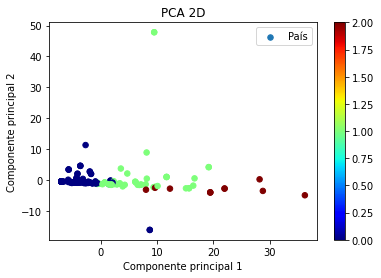

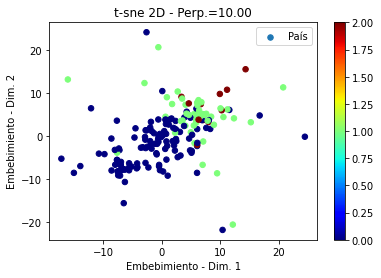

True

In [113]:
img_path=''
pre_exploratorio(Xtrain,ytrain,img_path,'País',175,0)

In [46]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib 
steps=[
       [('rep',  PCA()),
        ('cla', GaussianNB())],
       
       [('rep',  PCA()),
        ('cla', SGDClassifier(loss='log'))],
       
       [('rep',  PCA()),
        ('cla', LinearDiscriminantAnalysis(solver='svd'))],

       [('rep',  PCA()),
        ('cla', LinearDiscriminantAnalysis(solver='eigen',
                                           shrinkage='auto'))],
       
       [('rep',  PCA()),
        ('cla', QuadraticDiscriminantAnalysis())],

       [('rep',  PCA()),
        ('cla', KNeighborsClassifier(algorithm='auto'))],
       
       [('rep',  PCA()),
        ('cla', LogisticRegression(solver='lbfgs'))],
       
       [('rep',  PCA()),
        ('cla', SVC(kernel='rbf'))],
       
       [('rep',  PCA()),
        ('cla', RandomForestClassifier(max_features='auto'))],
       
      ]


parameters = [
              
              {
              'rep__n_components': [0.1, 0.5, 0.9]        
              },    
    
              {
              'rep__n_components': [0.1, 0.5, 0.9],
              'cla__alpha': [0.0001, 0.1, 0.5, 1]    
              },
    
              {
              'rep__n_components': [0.1, 0.5, 0.9]        
              },

              {
              'rep__n_components': [0.1, 0.5, 0.9]        
              },
    
              {
              'rep__n_components': [0.1, 0.5, 0.9],
              'cla__reg_param': [0, 0.5, 1]
              },
    
              {
              'rep__n_components': [0.1, 0.5, 0.9],
              'cla__n_neighbors': [0.1, 1, 3, 5]
              },

              {
              'rep__n_components': [0.1, 0.5, 0.9],
              'cla__C': [0.1, 0.5, 1]
              },
    
              {
              'rep__n_components': [0.1, 0.5, 0.9],
              'cla__C': [0.1, 0.5, 1]
              },
    
              {
              'rep__n_components': [0.1, 0.5, 0.9],
              'cla__n_estimators': [20, 100, 300, 500]
              },
    
             ]

label_models = ['Naive_GaussianNB','SGDlog',
                'LDAsvd','LDAeigen','QDA','KNeighbors','Logisticlbfgs',
                'SVCrbf','RandomForest']

In [47]:
best_model = []
filename = ''#'resultados/people_comp'
for i in range(len(steps)):
    print('modelo %d/%d' % (i+1,len(steps)))
    grid_search = GridSearchCV(Pipeline(steps[i]), parameters[i], n_jobs=-1,cv=5,
                                scoring='balanced_accuracy',verbose=10)
    grid_search.fit(Xtrain, ytrain)
    #print(grid_search.cv_results_)
    #mejor modelo entrenado
    best_model += [grid_search.best_estimator_]
    joblib.dump(best_model,filename+".pkl")

print('Mejores modelos:\n')
best_model

modelo 1/9
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0500s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0951s.) Setting batch_size=4.


modelo 2/9
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1390s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0348s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0713s.) Setting batch_size=4.


modelo 3/9
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0275s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0923s.) Setting batch_size=4.


modelo 4/9
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0284s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0641s.) Setting batch_size=4.


modelo 5/9
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1686s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0394s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0644s.) Setting batch_size=4.


modelo 6/9
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1061s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0646s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s


modelo 7/9
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1227s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0331s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0649s.) Setting batch_size=4.


modelo 8/9
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1326s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0991s.) Setting batch_size=2.


modelo 9/9
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0160s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   16.7s finished


Mejores modelos:



[Pipeline(memory=None,
          steps=[('rep',
                  PCA(copy=True, iterated_power='auto', n_components=0.1,
                      random_state=None, svd_solver='auto', tol=0.0,
                      whiten=False)),
                 ('cla', GaussianNB(priors=None, var_smoothing=1e-09))],
          verbose=False), Pipeline(memory=None,
          steps=[('rep',
                  PCA(copy=True, iterated_power='auto', n_components=0.9,
                      random_state=None, svd_solver='auto', tol=0.0,
                      whiten=False)),
                 ('cla',
                  SGDClassifier(alpha=1, average=False, class_weight=None,
                                early_stopping=False, epsilon=0.1, eta0=0.0,
                                fit_intercept=True, l1_ratio=0.15,
                                learning_rate='optimal', loss='log',
                                max_iter=1000, n_iter_no_change=5, n_jobs=None,
                                penalty='l2', power

Evaluando modelo 1/9


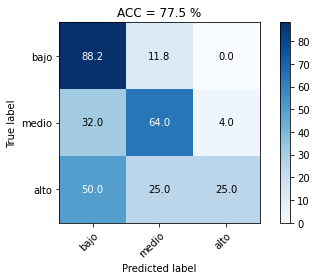

              precision    recall  f1-score   support

        bajo       0.82      0.88      0.85        51
       medio       0.70      0.64      0.67        25
        alto       0.50      0.25      0.33         4

    accuracy                           0.78        80
   macro avg       0.67      0.59      0.62        80
weighted avg       0.76      0.78      0.77        80

Evaluando modelo 2/9


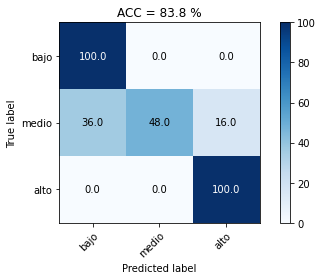

              precision    recall  f1-score   support

        bajo       0.85      1.00      0.92        51
       medio       1.00      0.48      0.65        25
        alto       0.50      1.00      0.67         4

    accuracy                           0.84        80
   macro avg       0.78      0.83      0.74        80
weighted avg       0.88      0.84      0.82        80

Evaluando modelo 3/9


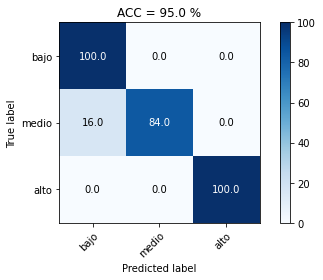

              precision    recall  f1-score   support

        bajo       0.93      1.00      0.96        51
       medio       1.00      0.84      0.91        25
        alto       1.00      1.00      1.00         4

    accuracy                           0.95        80
   macro avg       0.98      0.95      0.96        80
weighted avg       0.95      0.95      0.95        80

Evaluando modelo 4/9


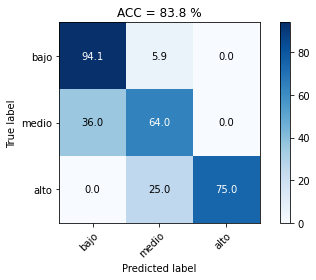

              precision    recall  f1-score   support

        bajo       0.84      0.94      0.89        51
       medio       0.80      0.64      0.71        25
        alto       1.00      0.75      0.86         4

    accuracy                           0.84        80
   macro avg       0.88      0.78      0.82        80
weighted avg       0.84      0.84      0.83        80

Evaluando modelo 5/9


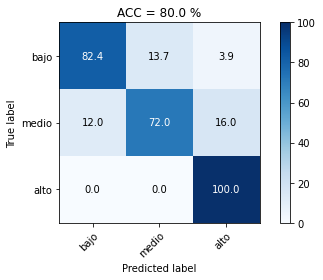

              precision    recall  f1-score   support

        bajo       0.93      0.82      0.87        51
       medio       0.72      0.72      0.72        25
        alto       0.40      1.00      0.57         4

    accuracy                           0.80        80
   macro avg       0.68      0.85      0.72        80
weighted avg       0.84      0.80      0.81        80

Evaluando modelo 6/9


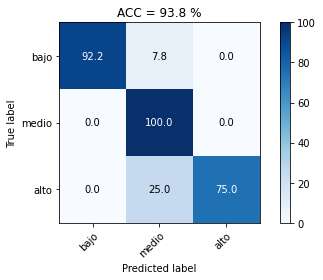

              precision    recall  f1-score   support

        bajo       1.00      0.92      0.96        51
       medio       0.83      1.00      0.91        25
        alto       1.00      0.75      0.86         4

    accuracy                           0.94        80
   macro avg       0.94      0.89      0.91        80
weighted avg       0.95      0.94      0.94        80

Evaluando modelo 7/9


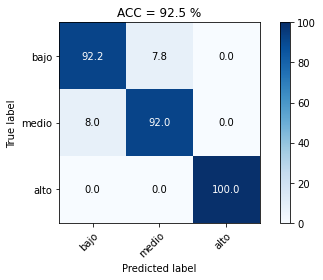

              precision    recall  f1-score   support

        bajo       0.96      0.92      0.94        51
       medio       0.85      0.92      0.88        25
        alto       1.00      1.00      1.00         4

    accuracy                           0.93        80
   macro avg       0.94      0.95      0.94        80
weighted avg       0.93      0.93      0.93        80

Evaluando modelo 8/9


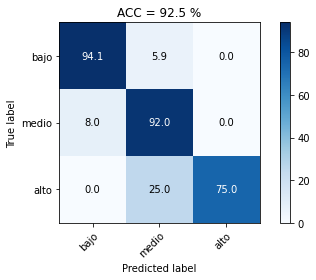

              precision    recall  f1-score   support

        bajo       0.96      0.94      0.95        51
       medio       0.85      0.92      0.88        25
        alto       1.00      0.75      0.86         4

    accuracy                           0.93        80
   macro avg       0.94      0.87      0.90        80
weighted avg       0.93      0.93      0.93        80

Evaluando modelo 9/9


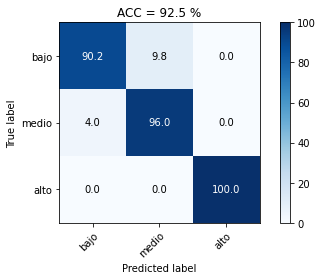

              precision    recall  f1-score   support

        bajo       0.98      0.90      0.94        51
       medio       0.83      0.96      0.89        25
        alto       1.00      1.00      1.00         4

    accuracy                           0.93        80
   macro avg       0.94      0.95      0.94        80
weighted avg       0.93      0.93      0.93        80



In [48]:
#%% Paso 5: evaluar sobre Xtest
my_model_loaded = joblib.load(filename+".pkl")
path_img = ''
for i in range(len(my_model_loaded)):
    print('Evaluando modelo %d/%d' % (i+1,len(my_model_loaded)))

    ytest_e = my_model_loaded[i].predict(Xtest)
    acc = accuracy_score(ytest,ytest_e)
     
    plot_confusion_matrix(
                          ytest, ytest_e, 
                          classes=target_name,
                          normalize=True,
                          title='ACC = %.1f %%' % (100*acc)
                          )
    plt.autoscale()                    
    plt.show()
    
    cr = classification_report(
                               ytest, ytest_e, 
                               labels=range(target_name.shape[0]),
                               target_names=target_name
                               )                          
    #support = #muestras en la clase estudiada
    print(cr)

Evaluando ROC modelo 1/9


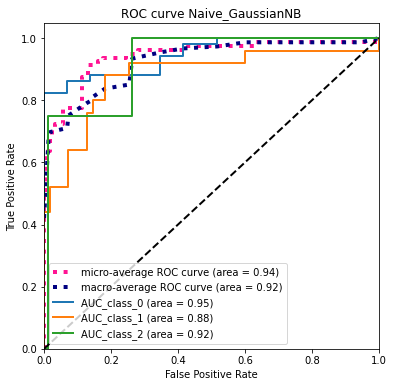

Evaluando ROC modelo 2/9


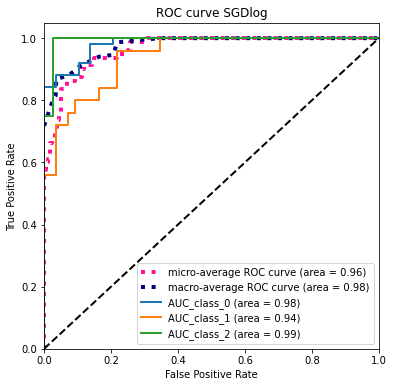

Evaluando ROC modelo 3/9


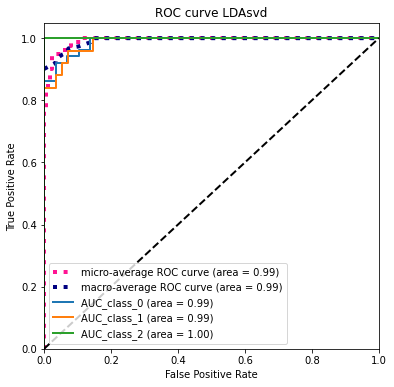

Evaluando ROC modelo 4/9


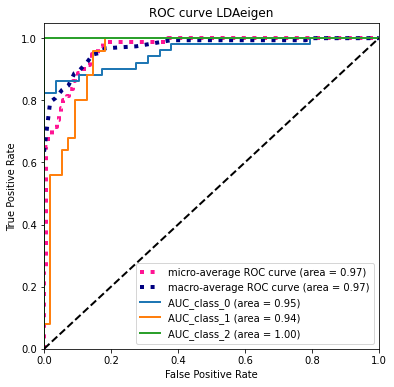

Evaluando ROC modelo 5/9


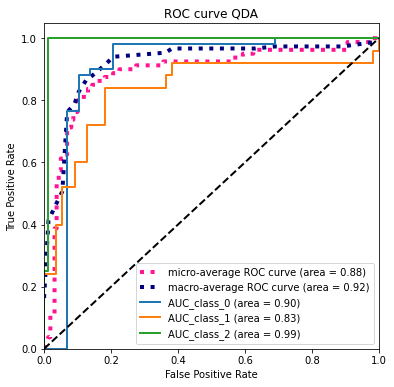

Evaluando ROC modelo 6/9


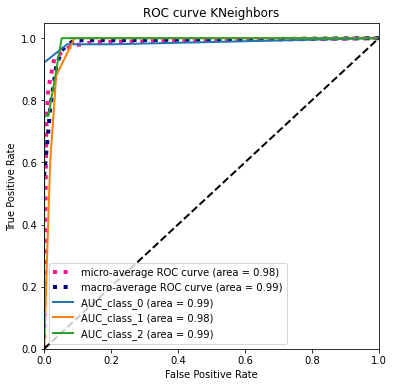

Evaluando ROC modelo 7/9


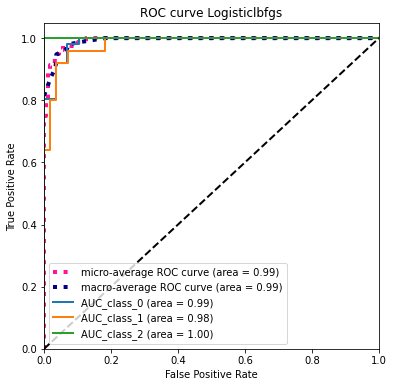

Evaluando ROC modelo 8/9


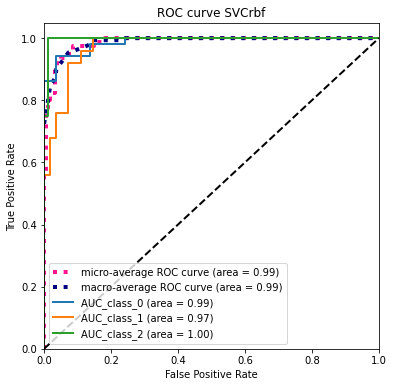

Evaluando ROC modelo 9/9


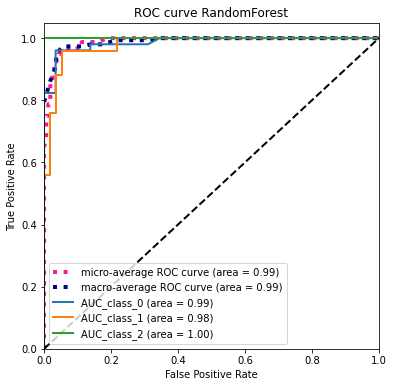

In [49]:

from sklearn.preprocessing import label_binarize

ytrain_b = label_binarize(ytrain, classes=range(target_name.shape[0]))
ytest_b = label_binarize(ytest, classes=range(target_name.shape[0]))
path_img=''
for i in range(len(my_model_loaded)):
    print('Evaluando ROC modelo %d/%d' % (i+1,len(my_model_loaded)))
    try:
      ytest_score = my_model_loaded[i].predict_proba(Xtest) #debe calcularse la funcion de decision o el posterior de la probabilidad
    except:
      ytest_score = my_model_loaded[i].decision_function(Xtest)
    roc_auc, fpr, tpr, n_classes = roc_multiclass(ytest_b,ytest_score)
    roc_auc_mc(roc_auc,fpr,tpr,n_classes,'ROC curve ' + label_models[i],path_img)

##Casos confirmados acumulados y recuperación acumulada frente a análisis de muertes acumuladas

La variación de casos confirmados acumulados y recuperación acumulada con muertes acumuladas puede mostrar una tendencia. Estas 2 curvas representan lo mismo. Además, estas curvas deben ser una línea recta, como se muestra en la primera curva, pero la segunda curva no muestra esa tendencia, y a medida que aumenta el número de casos recuperados, la muerte aumenta a un ritmo más rápido.
- 1ra curva: Casos confirmados acumulados Vs Muertes acumuladas
- 2da curva: Recuperados acumulados VS Muertes acumuladas

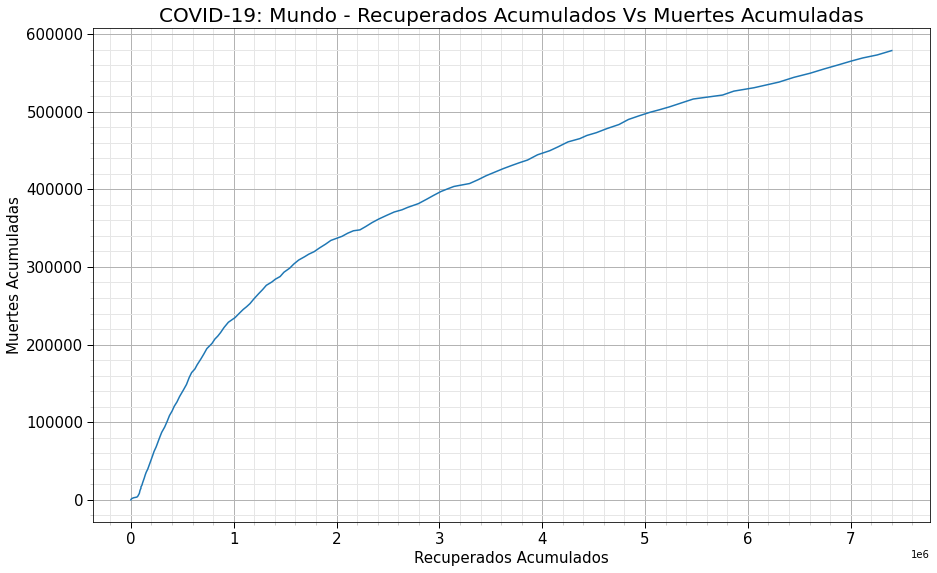

In [60]:
cols =1
rows = 2
f = plt.figure(figsize=(15,10*rows))
# SubPlot 2
ax = f.add_subplot(212)
mortality_rate = get_mortality_rate(confirmed,deaths)
plt.plot(np.sum(np.asarray(recovered.iloc[:,2:]),axis = 0),np.sum(np.asarray(deaths.iloc[:,2:]),axis = 0))

axis_label = ["Recuperados Acumulados","Muertes Acumuladas"]
plt_title = "COVID-19: Mundo - Recuperados Acumulados Vs Muertes Acumuladas"
plot_params(ax,axis_label,plt_title)
plt.minorticks_on()
plt.show()

In [61]:
df_recovered = recovered.groupby('Country/Region').sum().sort_values(recovered.columns[-1],ascending =False).head(20).replace(np.nan,0)
df_deaths = deaths.groupby('Country/Region').sum().sort_values(deaths.columns[-1],ascending =False).head(20).replace(np.nan,0)
tags = df_recovered.index

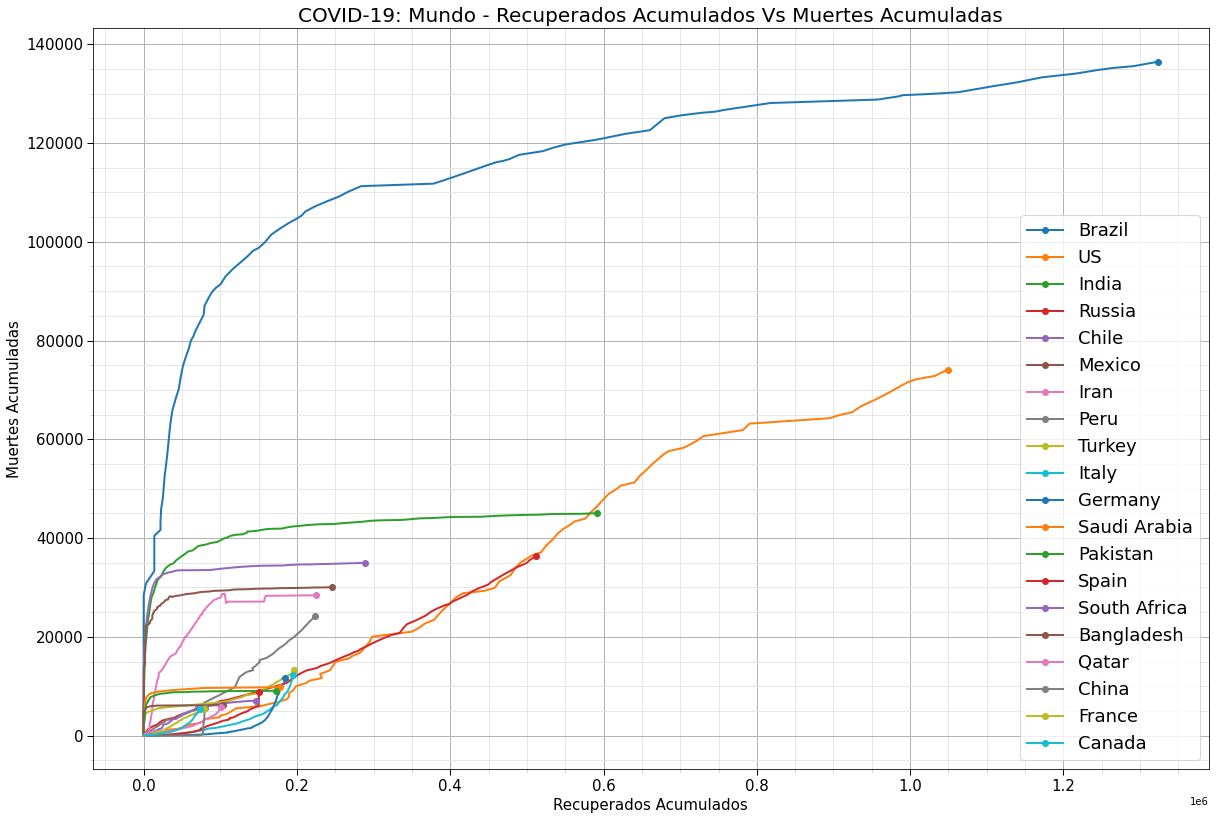

In [114]:
f = plt.figure(figsize=(20,30))
ax = f.add_subplot(211)
for i in range(len(df_recovered.iloc[0:])):
  plt.plot(np.asarray(df_recovered.iloc[i,0:]),np.asarray(df_deaths.iloc[i,0:]),'-o',label=tags[i],linewidth =2, markevery=[-1])

axis_label = ["Recuperados Acumulados","Muertes Acumuladas"]
plt_title = "COVID-19: Mundo - Recuperados Acumulados Vs Muertes Acumuladas"
plt.legend(fontsize=18) 
plot_params(ax,axis_label,plt_title)

Se puede observar que las graficas de cada país no tiene una tendencia lineal, esto se debe a que la mayoria de paises tienen mas personas Recuperadas que Muertas por Covid-19, se puede notar que el comportamiento de algunos paises es contraria, por lo tanto esta tendencia puede ser alarmante.